In [2]:
import pandas as pd

In [3]:
1#Reading all the csv files
df1 = pd.read_csv(r"C:\Users\HP\Desktop\Medicalanalysis\Resale Flat Prices (Based on Approval Date), 1990 - 1999.csv")
df2 = pd.read_csv(r"C:\Users\HP\Desktop\Medicalanalysis\Resale Flat Prices (Based on Approval Date), 2000 - Feb 2012.csv")
df3 = pd.read_csv(r"C:\Users\HP\Desktop\Medicalanalysis\Resale Flat Prices (Based on Registration Date), From Jan 2015 to Dec 2016.csv")
df4 = pd.read_csv(r"C:\Users\HP\Desktop\Medicalanalysis\Resale Flat Prices (Based on Registration Date), From Mar 2012 to Dec 2014.csv")
df5 = pd.read_csv(r"C:\Users\HP\Desktop\Medicalanalysis\Resale flat prices based on registration date from Jan-2017 onwards.csv")

In [4]:
2#Checking the head
print(df1.head)
print(df2.head)
print(df3.head)
print(df4.head)
print(df5.head)

<bound method NDFrame.head of           month        town  flat_type block       street_name storey_range  \
0       1990-01  ANG MO KIO     1 ROOM   309  ANG MO KIO AVE 1     10 TO 12   
1       1990-01  ANG MO KIO     1 ROOM   309  ANG MO KIO AVE 1     04 TO 06   
2       1990-01  ANG MO KIO     1 ROOM   309  ANG MO KIO AVE 1     10 TO 12   
3       1990-01  ANG MO KIO     1 ROOM   309  ANG MO KIO AVE 1     07 TO 09   
4       1990-01  ANG MO KIO     3 ROOM   216  ANG MO KIO AVE 1     04 TO 06   
...         ...         ...        ...   ...               ...          ...   
287191  1999-12      YISHUN  EXECUTIVE   611      YISHUN ST 61     10 TO 12   
287192  1999-12      YISHUN  EXECUTIVE   324       YISHUN CTRL     01 TO 03   
287193  1999-12      YISHUN  EXECUTIVE   392      YISHUN AVE 6     07 TO 09   
287194  1999-12      YISHUN  EXECUTIVE   356    YISHUN RING RD     04 TO 06   
287195  1999-12      YISHUN  EXECUTIVE   358    YISHUN RING RD     01 TO 03   

        floor_area_sq

In [5]:
3#Merging all the dataframes
df = pd.concat([df1, df2, df3, df4, df5])

In [6]:
4#Checking Columns and head
print(df.head(5))

     month        town flat_type block       street_name storey_range  \
0  1990-01  ANG MO KIO    1 ROOM   309  ANG MO KIO AVE 1     10 TO 12   
1  1990-01  ANG MO KIO    1 ROOM   309  ANG MO KIO AVE 1     04 TO 06   
2  1990-01  ANG MO KIO    1 ROOM   309  ANG MO KIO AVE 1     10 TO 12   
3  1990-01  ANG MO KIO    1 ROOM   309  ANG MO KIO AVE 1     07 TO 09   
4  1990-01  ANG MO KIO    3 ROOM   216  ANG MO KIO AVE 1     04 TO 06   

   floor_area_sqm      flat_model  lease_commence_date  resale_price  \
0            31.0        IMPROVED                 1977        9000.0   
1            31.0        IMPROVED                 1977        6000.0   
2            31.0        IMPROVED                 1977        8000.0   
3            31.0        IMPROVED                 1977        6000.0   
4            73.0  NEW GENERATION                 1976       47200.0   

  remaining_lease  
0             NaN  
1             NaN  
2             NaN  
3             NaN  
4             NaN  


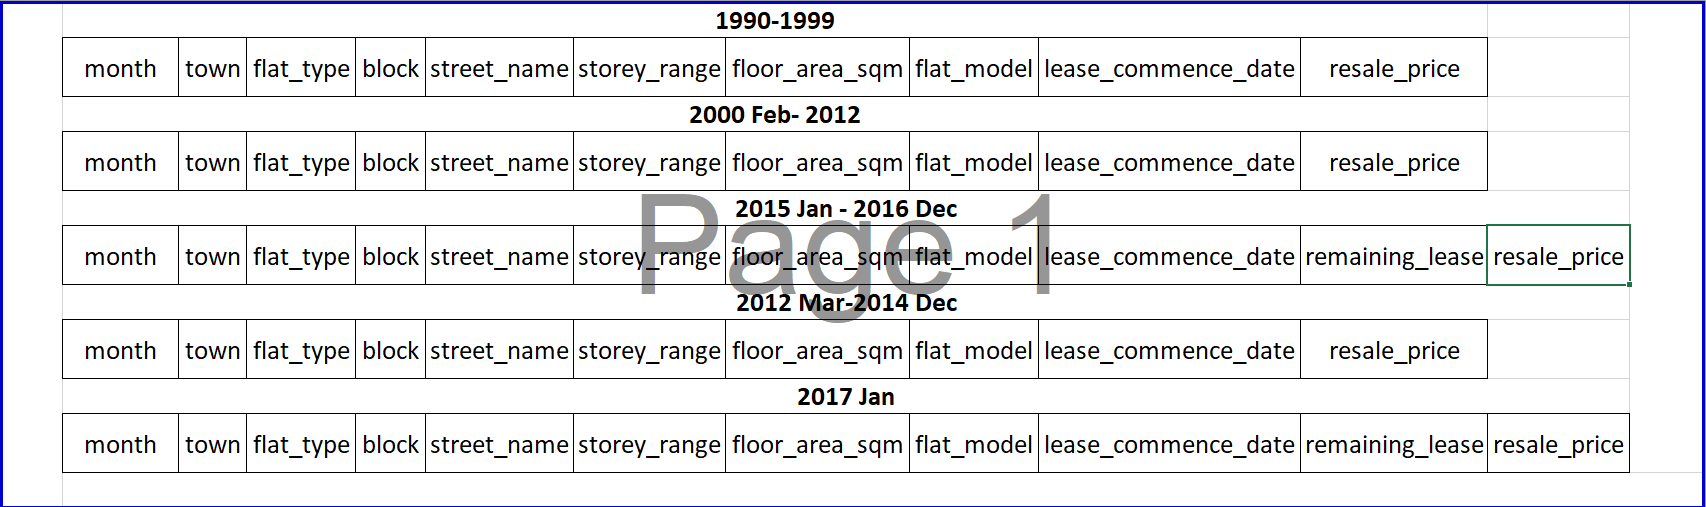

In [7]:
5#Checking data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 943666 entries, 0 to 197462
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                943666 non-null  object 
 1   town                 943666 non-null  object 
 2   flat_type            943666 non-null  object 
 3   block                943666 non-null  object 
 4   street_name          943666 non-null  object 
 5   storey_range         943666 non-null  object 
 6   floor_area_sqm       943666 non-null  float64
 7   flat_model           943666 non-null  object 
 8   lease_commence_date  943666 non-null  int64  
 9   resale_price         943666 non-null  float64
 10  remaining_lease      234616 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 86.4+ MB


About the Data type in the table above:

* Date: month, year
* Numeric: block, floor_area_sqm, lease_commence_date, remaining_lease, resale_price
* Categorical: town, flat_type, storey_range, flat_model, street_name, block
* Columns to be converted to numeric: month, year, town, flat_type, block, storey_range, flat_model, street_name

In [8]:
6#Removing the alphanumeric characters from the block column
# Converting the block column to int
df['block'] = df['block'].astype(str)
df['block'] = df['block'].apply(lambda x: ''.join(char for char in x if char in '0123456789'))
# Now df['block'] should contain only digits in each element
df['block'] = df['block'].astype(int)

In [9]:
7#converting the month column to year and month
df['month'] = pd.to_datetime(df['month'])
#Convert month to year and month
df['year'] = df['month'].apply(lambda i : i.year)
df['month'] = df['month'].apply(lambda i : i.month)

In [10]:
8#Summarizing the data
df.describe()

,month,block,floor_area_sqm,lease_commence_date,resale_price,year
count,943666.000000,943666.000000,943666.000000,943666.000000,9.436660e+05,943666.000000
mean,6.587284,349.025660,95.684093,1988.448768,3.260964e+05,2006.480905
std,3.408451,255.086912,25.794987,10.835750,1.754684e+05,9.530865
min,1.000000,1.000000,28.000000,1966.000000,5.000000e+03,1990.000000
25%,4.000000,127.000000,73.000000,1981.000000,1.950000e+05,1999.000000
50%,7.000000,302.000000,93.000000,1986.000000,3.000000e+05,2005.000000
75%,10.000000,534.000000,113.000000,1996.000000,4.230000e+05,2014.000000
max,12.000000,999.000000,366.700000,2021.000000,1.600000e+06,2025.000000


In [11]:
#9
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 943666 entries, 0 to 197462
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                943666 non-null  int64  
 1   town                 943666 non-null  object 
 2   flat_type            943666 non-null  object 
 3   block                943666 non-null  int32  
 4   street_name          943666 non-null  object 
 5   storey_range         943666 non-null  object 
 6   floor_area_sqm       943666 non-null  float64
 7   flat_model           943666 non-null  object 
 8   lease_commence_date  943666 non-null  int64  
 9   resale_price         943666 non-null  float64
 10  remaining_lease      234616 non-null  object 
 11  year                 943666 non-null  int64  
dtypes: float64(2), int32(1), int64(3), object(6)
memory usage: 90.0+ MB


In [12]:
10#Checking for null values
df.isnull().sum()

month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
storey_range                0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease        709050
year                        0
dtype: int64

In [13]:
11#fill the null values suing ML models
df = df.fillna(0)

In [14]:
df.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
remaining_lease        0
year                   0
dtype: int64

In [15]:
12#saving the data
df.to_csv('ResaleFlatPrices.csv', index=False)

In [16]:
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year
0,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,0,1990
1,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,0,1990
2,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,0,1990
3,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,0,1990
4,1,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,0,1990


Exploratory Data Analysis

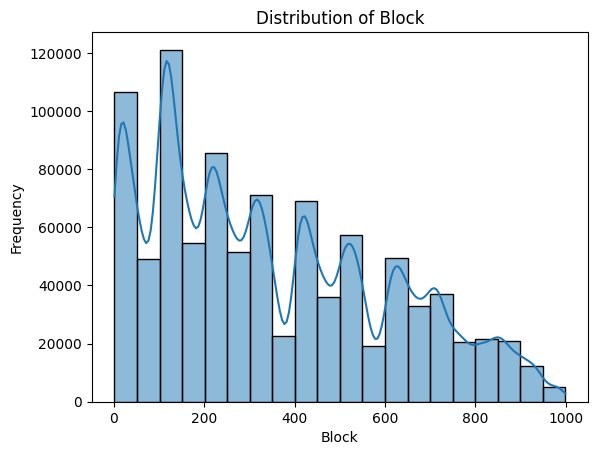

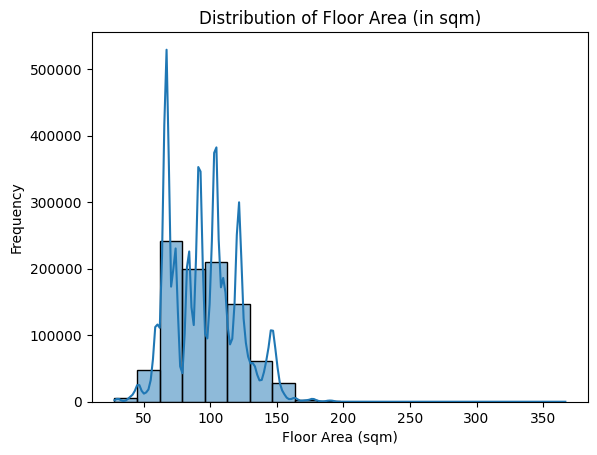

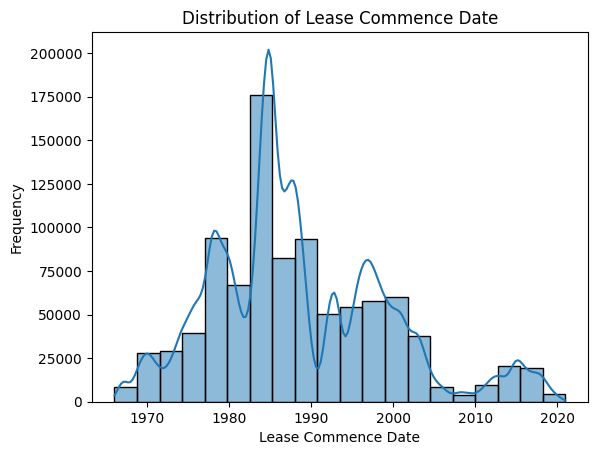

In [17]:
13#Checking Distribution
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting 'block' distribution (assumes it's numerical after cleaning)
sns.histplot(df['block'], kde=True, bins=20)
plt.title('Distribution of Block')
plt.xlabel('Block')
plt.ylabel('Frequency')
plt.show()

# Plotting 'floor_area_sqm' distribution
sns.histplot(df['floor_area_sqm'], kde=True, bins=20)
plt.title('Distribution of Floor Area (in sqm)')
plt.xlabel('Floor Area (sqm)')
plt.ylabel('Frequency')
plt.show()

# Plotting 'lease_commence_date' distribution (assuming it's a datetime column)
sns.histplot(df['lease_commence_date'], kde=True, bins=20)
plt.title('Distribution of Lease Commence Date')
plt.xlabel('Lease Commence Date')
plt.ylabel('Frequency')
plt.show()


The distribution of the block, floor_area_sqm and lease_commence_date are right skewed.

In [18]:
14#replacing MULTI-GENERATION with MULTI GENERATION
df['flat_type'] = df['flat_type'].replace('MULTI-GENERATION','MULTI GENERATION')
df['flat_type'].unique()

array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI GENERATION'], dtype=object)

          flat_type  flat_model
0            1 ROOM           2
1            2 ROOM           9
2            3 ROOM          15
3            4 ROOM          18
4            5 ROOM          17
5         EXECUTIVE           8
6  MULTI GENERATION           2


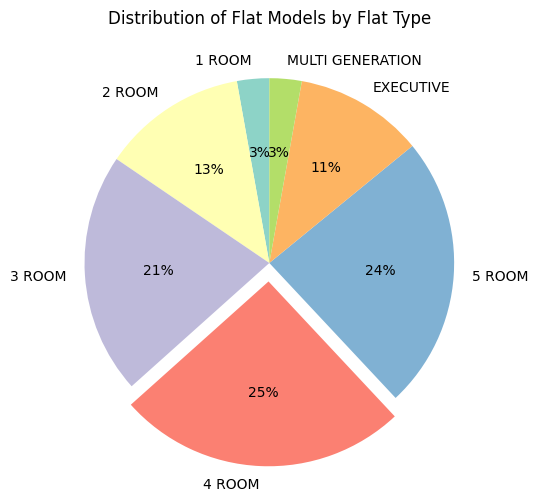

In [19]:
15#Checking flat type with respect to flat model
import matplotlib.pyplot as plt

# Group by 'flat_type' and count unique 'flat_model'
temp = pd.DataFrame(df.groupby('flat_type')['flat_model'].nunique()).reset_index()

# Print the DataFrame to verify the output
print(temp)

# Plotting a pie chart
plt.figure(figsize=(12, 6))

# Pie chart with additional formatting
plt.pie(temp['flat_model'], labels=temp['flat_type'], autopct='%.0f%%', startangle=90, 
        colors=sns.color_palette('Set3', len(temp['flat_type'])), explode=[0.1 if i == temp['flat_model'].idxmax() else 0 for i in range(len(temp))])

# Adding a title to the plot
plt.title('Distribution of Flat Models by Flat Type')

# Display the pie chart
plt.show()


# In Floor type with respect to floor model
4 Room, 5 Room and 3 ROOM are the most popular flat types folowed by others

c:\Users\HP\anaconda3\Lib\site-packages\seaborn\categorical.py:700: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  artists = ax.bxp(**boxplot_kws)
c:\Users\HP\anaconda3\Lib\site-packages\seaborn\categorical.py:700: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  artists = ax.bxp(**boxplot_kws)
c:\Users\HP\anaconda3\Lib\site-packages\seaborn\categorical.py:700: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  artists = ax.bxp(**boxplot_kws)
c:\Users\HP\anaconda3\Lib\site-packages\seaborn\categorical.py:700: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  artists = ax.bxp(**boxplot_kws)
c:\Users\HP\anaconda3\Lib\site-packages\seaborn\categorical.py:700: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  artists = ax.bxp(**boxplot_kws)
c:\Users\HP\ana

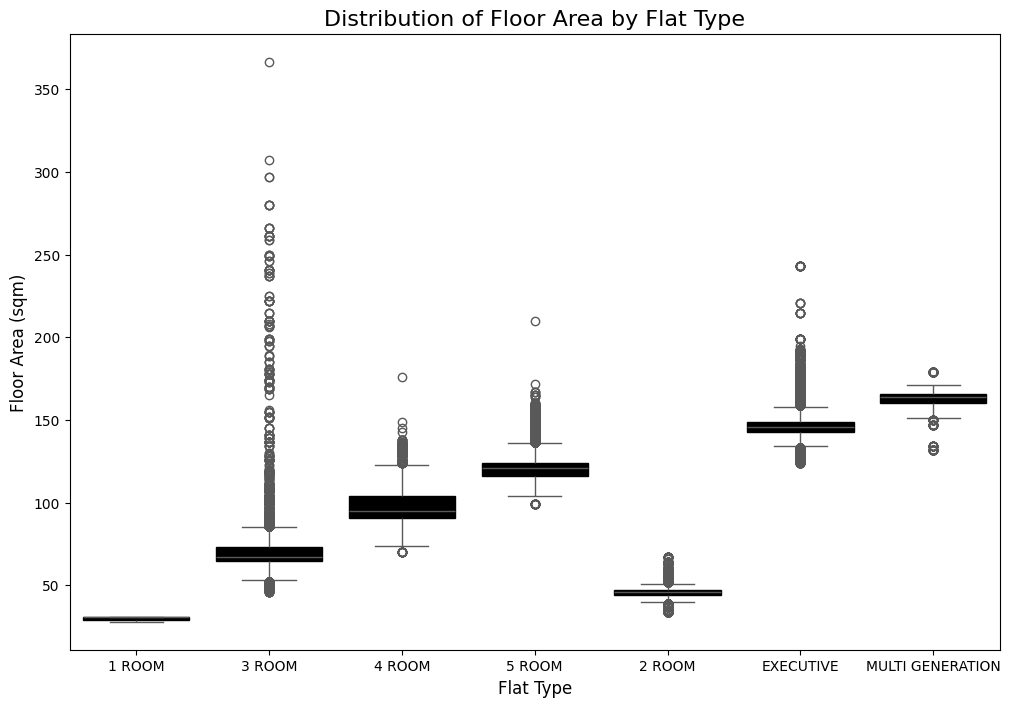

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a boxplot to visualize the distribution of floor_area_sqm by flat_type
plt.figure(figsize=(12, 8))

# Assigning 'flat_type' to 'hue' for color grouping, and setting legend=False
sns.boxplot(x='flat_type', y='floor_area_sqm', data=df, showfliers=True, 
            hue='flat_type', palette='Set2', boxprops=dict(facecolor='lightblue', color='black'))

# Adding titles and labels
plt.title('Distribution of Floor Area by Flat Type', fontsize=16)
plt.xlabel('Flat Type', fontsize=12)
plt.ylabel('Floor Area (sqm)', fontsize=12)

# Display the plot
plt.show()


On the bases of floor area to flat type *4 room and 3 room are the most popular flat types

C:\Users\HP\AppData\Local\Temp\ipykernel_6140\4235969374.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='flat_type', y='resale_price', data=df, showfliers=True,
c:\Users\HP\anaconda3\Lib\site-packages\seaborn\categorical.py:700: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  artists = ax.bxp(**boxplot_kws)
c:\Users\HP\anaconda3\Lib\site-packages\seaborn\categorical.py:700: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  artists = ax.bxp(**boxplot_kws)
c:\Users\HP\anaconda3\Lib\site-packages\seaborn\categorical.py:700: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  artists = ax.bxp(**boxplot_kws)
c:\Users\HP\anaconda3\Lib\site-packages\seaborn\categorical.py:700: UserWarning: Setting t

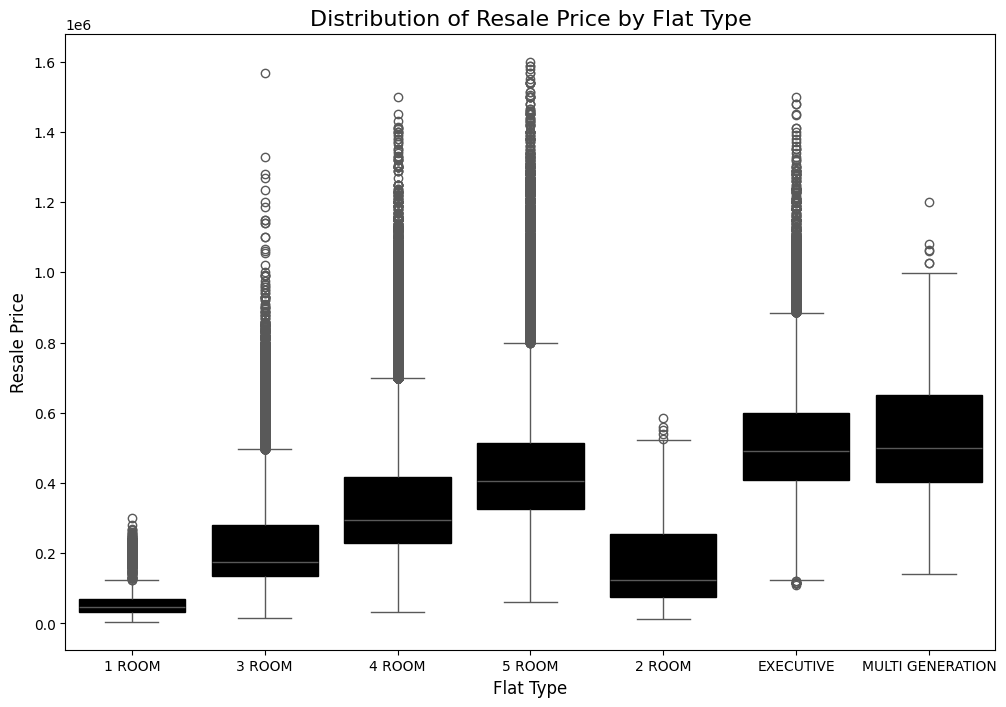

In [21]:
17# Distribution of resale_price based on flat_type
# Create a boxplot to visualize the distribution of resale_price by flat_type
plt.figure(figsize=(12, 8))

# Boxplot with color customization, and optionally showing outliers
sns.boxplot(x='flat_type', y='resale_price', data=df, showfliers=True, 
            palette='Set2', boxprops=dict(facecolor='lightblue', color='black'))

# Adding titles and labels
plt.title('Distribution of Resale Price by Flat Type', fontsize=16)
plt.xlabel('Flat Type', fontsize=12)
plt.ylabel('Resale Price', fontsize=12)

# Display the plot
plt.show()

On the bases of flat type to resale price

* Multi Generation and Executive are the most expensive flat types
* 1 Room and 2 Room are the least expensive flat types

In [22]:
df.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price',
       'remaining_lease', 'year'],
      dtype='object')

In [23]:
# List of columns to check unique values
columns_to_check = ['month', 'year', 'town', 'flat_type', 'storey_range', 'flat_model', 'street_name']

# Loop through each column and print its unique values
for column in columns_to_check:
    print(f"Unique values in '{column}':")
    print(df[column].unique())
    print("---------------------------------------------------------------")


Unique values in 'month':
[ 1  2  3  4  5  6  7  8  9 10 11 12]
---------------------------------------------------------------
Unique values in 'year':
[1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003
 2004 2005 2006 2007 2008 2009 2010 2011 2012 2015 2016 2013 2014 2017
 2018 2019 2020 2021 2022 2023 2024 2025]
---------------------------------------------------------------
Unique values in 'town':
['ANG MO KIO' 'BEDOK' 'BISHAN' 'BUKIT BATOK' 'BUKIT MERAH' 'BUKIT TIMAH'
 'CENTRAL AREA' 'CHOA CHU KANG' 'CLEMENTI' 'GEYLANG' 'HOUGANG'
 'JURONG EAST' 'JURONG WEST' 'KALLANG/WHAMPOA' 'MARINE PARADE'
 'QUEENSTOWN' 'SENGKANG' 'SERANGOON' 'TAMPINES' 'TOA PAYOH' 'WOODLANDS'
 'YISHUN' 'LIM CHU KANG' 'SEMBAWANG' 'BUKIT PANJANG' 'PASIR RIS' 'PUNGGOL']
---------------------------------------------------------------
Unique values in 'flat_type':
['1 ROOM' '3 ROOM' '4 ROOM' '5 ROOM' '2 ROOM' 'EXECUTIVE'
 'MULTI GENERATION']
------------------------------------------------------

In [24]:
import json

# List of columns to check and save unique values
columns = ['town', 'flat_type', 'street_name', 'storey_range', 'flat_model']

# Loop through each column and save its unique values to JSON
for column in columns:
    unique_values = df[column].unique().tolist()  # Convert unique values to list
    with open(f'{column}.json', 'w') as file:
        json.dump(unique_values, file)


In [25]:
19#sum of unique values
df.nunique()

month                    12
town                     27
flat_type                 7
block                   986
street_name             589
storey_range             25
floor_area_sqm          218
flat_model               34
lease_commence_date      56
resale_price           9782
remaining_lease         733
year                     36
dtype: int64

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 943666 entries, 0 to 197462
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                943666 non-null  int64  
 1   town                 943666 non-null  object 
 2   flat_type            943666 non-null  object 
 3   block                943666 non-null  int32  
 4   street_name          943666 non-null  object 
 5   storey_range         943666 non-null  object 
 6   floor_area_sqm       943666 non-null  float64
 7   flat_model           943666 non-null  object 
 8   lease_commence_date  943666 non-null  int64  
 9   resale_price         943666 non-null  float64
 10  remaining_lease      943666 non-null  object 
 11  year                 943666 non-null  int64  
dtypes: float64(2), int32(1), int64(3), object(6)
memory usage: 90.0+ MB


The category column has been converted into numeric using an encoder

In [27]:
from sklearn.preprocessing import LabelEncoder

# List of columns to be encoded
columns_to_encode = ['town', 'flat_type', 'street_name', 'storey_range', 'flat_model']

# Create a dictionary to store LabelEncoders for each column (optional)
encoders = {}

# Loop through each column and apply LabelEncoder
for column in columns_to_encode:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    encoders[column] = le  # Storing the encoder for potential future use

# If you need to reverse the encoding later, you can use encoders[column].inverse_transform(df[column])


In [28]:
import pickle
from sklearn.preprocessing import LabelEncoder

# Create LabelEncoders for each column
le1 = LabelEncoder()
le2 = LabelEncoder()
le3 = LabelEncoder()
le4 = LabelEncoder()
le5 = LabelEncoder()

# Apply LabelEncoder to the columns
df['town'] = le1.fit_transform(df['town'])
df['flat_type'] = le2.fit_transform(df['flat_type'])
df['street_name'] = le3.fit_transform(df['street_name'])
df['storey_range'] = le4.fit_transform(df['storey_range'])
df['flat_model'] = le5.fit_transform(df['flat_model'])

# Create a dictionary to store all the LabelEncoders
encoders = {
    'town': le1,
    'flat_type': le2,
    'street_name': le3,
    'storey_range': le4,
    'flat_model': le5
}

# Save the dictionary containing all encoders to a single pickle file
with open('label_encoders.pkl', 'wb') as file:
    pickle.dump(encoders, file)



In [29]:
category_to_check = 'Premium Apartment Loft'

# Ensure the category exists in the label encoder
if category_to_check in le.classes_:
    # Transform the chosen category to its encoded value
    encoded_value = le.transform([category_to_check])[0]
    print(f"The encoded value for '{category_to_check}' is: {encoded_value}")
else:
    print(f"The category '{category_to_check}' is not in the label encoder classes.")


The encoded value for 'Premium Apartment Loft' is: 24


In [30]:
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year
0,1,0,0,309,14,5,31.0,7,1977,9000.0,0,1990
1,1,0,0,309,14,2,31.0,7,1977,6000.0,0,1990
2,1,0,0,309,14,5,31.0,7,1977,8000.0,0,1990
3,1,0,0,309,14,4,31.0,7,1977,6000.0,0,1990
4,1,0,2,216,14,2,73.0,20,1976,47200.0,0,1990
...,...,...,...,...,...,...,...,...,...,...,...,...
197458,1,26,4,412,568,2,123.0,9,1993,700000.0,67 years 03 months,2025
197459,1,26,4,297,570,0,111.0,9,2000,608000.0,74 years 11 months,2025
197460,1,26,4,871,580,4,122.0,9,1988,738000.0,62 years 04 months,2025
197461,1,26,4,851,580,5,127.0,9,1988,740000.0,62 years 04 months,2025


<Axes: >

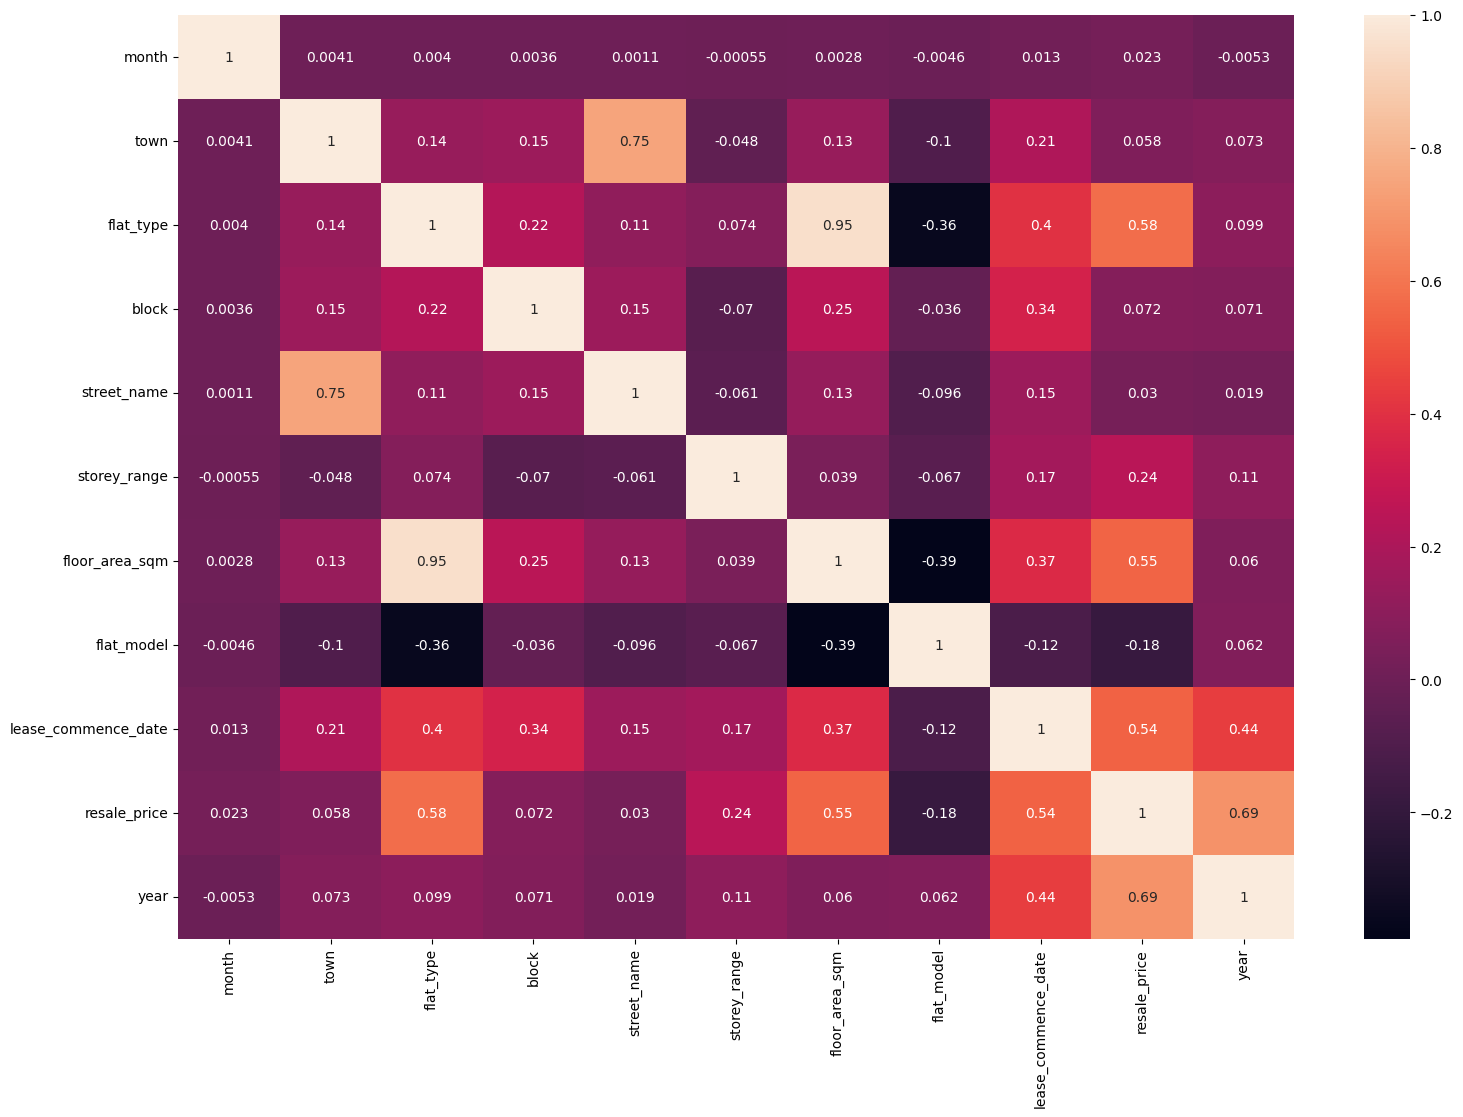

In [31]:
21#Correlation
feature_cols = ['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price', 'year']
plt.figure(figsize = (18,12))
sns.heatmap(df[feature_cols].corr(), annot = True)

Informations Obtained From Correlation

* Flat type and flat area are highly correlated
* Town and Street name are highly correlated
* Resale price and year are highly correlated
* Flat type and resale price are highly correlated
* Floor area and resale price are highly correlated
* resale_price and flat_type are highly correlated
* Town, month, street name and storey range are lessly correlated to resale price

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 943666 entries, 0 to 197462
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                943666 non-null  int64  
 1   town                 943666 non-null  int64  
 2   flat_type            943666 non-null  int64  
 3   block                943666 non-null  int32  
 4   street_name          943666 non-null  int64  
 5   storey_range         943666 non-null  int64  
 6   floor_area_sqm       943666 non-null  float64
 7   flat_model           943666 non-null  int64  
 8   lease_commence_date  943666 non-null  int64  
 9   resale_price         943666 non-null  float64
 10  remaining_lease      943666 non-null  object 
 11  year                 943666 non-null  int64  
dtypes: float64(2), int32(1), int64(8), object(1)
memory usage: 90.0+ MB


In [33]:
#describe
df.describe()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,year
count,943666.000000,943666.000000,943666.000000,943666.000000,943666.000000,943666.000000,943666.000000,943666.000000,943666.000000,9.436660e+05,943666.000000
mean,6.587284,13.667303,3.014639,349.025660,289.183286,3.419209,95.684093,15.718182,1988.448768,3.260964e+05,2006.480905
std,3.408451,8.788986,0.947914,255.086912,182.774679,2.675568,25.794987,6.657166,10.835750,1.754684e+05,9.530865
min,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,28.000000,0.000000,1966.000000,5.000000e+03,1990.000000
25%,4.000000,5.000000,2.000000,127.000000,125.000000,2.000000,73.000000,9.000000,1981.000000,1.950000e+05,1999.000000
50%,7.000000,13.000000,3.000000,302.000000,281.000000,4.000000,93.000000,16.000000,1986.000000,3.000000e+05,2005.000000
75%,10.000000,23.000000,4.000000,534.000000,465.000000,5.000000,113.000000,21.000000,1996.000000,4.230000e+05,2014.000000
max,12.000000,26.000000,6.000000,999.000000,588.000000,24.000000,366.700000,33.000000,2021.000000,1.600000e+06,2025.000000


In [34]:
22#
from sklearn.model_selection import train_test_split

# Assuming 'resale_price' and 'remaining_lease' are columns to be dropped
columns_to_drop = ['resale_price', 'remaining_lease']
# Separate features (X) and target variable (y)
X = df.drop(columns=columns_to_drop)
y = df['resale_price']

# Split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
23#
x_train

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,year
112850,11,14,2,11,509,5,65.0,9,1974,2021
311546,1,23,3,406,472,4,89.0,28,1986,2010
285238,4,0,3,219,14,5,92.0,21,1977,2009
31300,6,10,2,59,438,5,59.0,7,1977,1992
33247,12,11,4,572,224,5,117.0,9,1997,2000
...,...,...,...,...,...,...,...,...,...,...
259178,6,11,2,328,213,5,67.0,20,1983,1999
78642,2,25,4,214,333,13,118.0,9,1981,2002
131932,8,1,2,537,43,2,83.0,20,1980,1996
14308,10,20,3,507,516,0,91.0,16,2001,2015


In [36]:
24#
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 754932 entries, 112850 to 121958
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                754932 non-null  int64  
 1   town                 754932 non-null  int64  
 2   flat_type            754932 non-null  int64  
 3   block                754932 non-null  int32  
 4   street_name          754932 non-null  int64  
 5   storey_range         754932 non-null  int64  
 6   floor_area_sqm       754932 non-null  float64
 7   flat_model           754932 non-null  int64  
 8   lease_commence_date  754932 non-null  int64  
 9   year                 754932 non-null  int64  
dtypes: float64(1), int32(1), int64(8)
memory usage: 60.5 MB



In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In the end after running all the models, we can see that Decision Tree Regressor is the best model for this project.

* As it has the highest R2 score and lowest mean squared error
* It is computationally efficient

In [37]:
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year
0,1,0,0,309,14,5,31.0,7,1977,9000.0,0,1990
1,1,0,0,309,14,2,31.0,7,1977,6000.0,0,1990
2,1,0,0,309,14,5,31.0,7,1977,8000.0,0,1990
3,1,0,0,309,14,4,31.0,7,1977,6000.0,0,1990
4,1,0,2,216,14,2,73.0,20,1976,47200.0,0,1990
...,...,...,...,...,...,...,...,...,...,...,...,...
197458,1,26,4,412,568,2,123.0,9,1993,700000.0,67 years 03 months,2025
197459,1,26,4,297,570,0,111.0,9,2000,608000.0,74 years 11 months,2025
197460,1,26,4,871,580,4,122.0,9,1988,738000.0,62 years 04 months,2025
197461,1,26,4,851,580,5,127.0,9,1988,740000.0,62 years 04 months,2025


In [38]:
#month town flat_type block street_name	storey_range floor_area_sqm	flat_model lease_commence_date year
#1	    0	   2	  170	    17	          4	           69.0	         9	        20	           2000

Checking the output by giving an example

In [41]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import xgboost as xgb
import mlflow
import mlflow.sklearn

# Set the experiment name
mlflow.set_experiment("House_Price_Prediction")

# Load the dataset
file_path = r"C:\Users\HP\Desktop\Medicalanalysis\ResaleFlatPrices.csv"
df = pd.read_csv(file_path)
print("Dataset loaded successfully.")
print(df.info())

# Preprocessing
df.dropna(inplace=True)  # Drop rows with missing values
target_column = "resale_price"  # Replace with the actual target column
features = df.drop(columns=[target_column]).select_dtypes(include=np.number)
target = df[target_column]

# Train-Test Split
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Define a function to log metrics
def log_metrics(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"\n{model_name} Results:")
    print(f"Mean Absolute Error: {mae}")
    print(f"Mean Squared Error: {mse}")
    print(f"R2 Score: {r2}")
    mlflow.log_metric("mae", mae)
    mlflow.log_metric("mse", mse)
    mlflow.log_metric("r2", r2)

# Decision Tree Regressor
print("\nTraining Decision Tree Regressor...")
with mlflow.start_run(run_name="Decision_Tree"):
    dt = DecisionTreeRegressor(max_depth=10, random_state=42)
    dt.fit(x_train, y_train)
    y_pred_dt = dt.predict(x_test)
    log_metrics(y_test, y_pred_dt, "Decision Tree")
    input_example = x_train.iloc[:1]
    mlflow.sklearn.log_model(dt, "decision_tree_model", input_example=input_example)

# Random Forest Regressor
print("\nTraining Random Forest Regressor...")
with mlflow.start_run(run_name="Random_Forest"):
    rf = RandomForestRegressor(n_estimators=50, max_depth=10, random_state=42, n_jobs=-1)
    rf.fit(x_train, y_train)
    y_pred_rf = rf.predict(x_test)
    log_metrics(y_test, y_pred_rf, "Random Forest")
    input_example = x_train.iloc[:1]
    mlflow.sklearn.log_model(rf, "random_forest_model", input_example=input_example)

# Linear Regression
print("\nTraining Linear Regression...")
with mlflow.start_run(run_name="Linear_Regression"):
    lr = LinearRegression()
    lr.fit(x_train, y_train)
    y_pred_lr = lr.predict(x_test)
    log_metrics(y_test, y_pred_lr, "Linear Regression")
    input_example = x_train.iloc[:1]
    mlflow.sklearn.log_model(lr, "linear_regression_model", input_example=input_example)

# XGBoost Regressor
print("\nTraining XGBoost Regressor...")
with mlflow.start_run(run_name="XGBoost"):
    xgb_model = xgb.XGBRegressor(n_estimators=50, max_depth=10, random_state=42, n_jobs=-1)
    xgb_model.fit(x_train, y_train)
    y_pred_xgb = xgb_model.predict(x_test)
    log_metrics(y_test, y_pred_xgb, "XGBoost")
    input_example = x_train.iloc[:1]
    mlflow.sklearn.log_model(xgb_model, "xgboost_model", input_example=input_example)

print("\nAll experiments completed. Check MLflow for logged results.")


C:\Users\HP\AppData\Local\Temp\ipykernel_6140\981636030.py:17: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Dataset loaded successfully.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943666 entries, 0 to 943665
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                943666 non-null  int64  
 1   town                 943666 non-null  object 
 2   flat_type            943666 non-null  object 
 3   block                943666 non-null  int64  
 4   street_name          943666 non-null  object 
 5   storey_range         943666 non-null  object 
 6   floor_area_sqm       943666 non-null  float64
 7   flat_model           943666 non-null  object 
 8   lease_commence_date  943666 non-null  int64  
 9   resale_price         943666 non-null  float64
 10  remaining_lease      943666 non-null  object 
 11  year                 943666 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 86.4+ MB
None

Training Decision Tree Regressor...

Decision Tree Results:
Mean Absolute Err

C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\mlflow\types\utils.py:435: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(



Training Random Forest Regressor...

Random Forest Results:
Mean Absolute Error: 35768.336538587806
Mean Squared Error: 2829272248.4097657
R2 Score: 0.9086119973787475


C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\mlflow\types\utils.py:435: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(



Training Linear Regression...

Linear Regression Results:
Mean Absolute Error: 63989.981488123994
Mean Squared Error: 7627907873.289891
R2 Score: 0.7536118112667652


C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\mlflow\types\utils.py:435: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(



Training XGBoost Regressor...

XGBoost Results:
Mean Absolute Error: 21206.089504736374
Mean Squared Error: 1009877918.5533957
R2 Score: 0.9673800476713487


C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\mlflow\types\utils.py:435: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(



All experiments completed. Check MLflow for logged results.


In [ ]:
##Register the model

import mlflow

# Define the model path and name
model_uri = "runs:/f86013023030461d9ebefb8030aefea2/xgboost_model"  # Replace <RUN_ID> with the actual run ID
model_name = "House_Price_XGBoost_Model"

# Register the model
mlflow.register_model(model_uri=model_uri, name=model_name)

print(f"Model {model_name} registered successfully.")


Model House_Price_XGBoost_Model registered successfully.


Registered model 'House_Price_XGBoost_Model' already exists. Creating a new version of this model...
Created version '1' of model 'House_Price_XGBoost_Model'.


In [49]:
import mlflow
import mlflow.pyfunc
import pandas as pd

# Define the model name (the name you registered the model under)
model_name = "House_Price_XGBoost_Model"

# Load the model using the registered model's URI
model_uri = f"models:/{model_name}/latest"
model = mlflow.pyfunc.load_model(model_uri)


# Print the model's input signature to understand the expected features
print(model.metadata.signature)

# Example DataFrame for prediction (replace with actual data)
X = pd.DataFrame({
    'month': [5],  # Ensure 'month' is an integer (long type)
    'block': [123],  # Ensure 'block' is an integer (long type)
    'floor_area_sqm': [70.0],  # Ensure 'floor_area_sqm' is a float (double type)
    'lease_commence_date': [1995],  # Ensure 'lease_commence_date' is an integer (long type)
    'year': [2020]  # Ensure 'year' is an integer (long type)
})

# Drop any unnecessary features (if the model doesn't require them)
X = X.drop(columns=['flat_type', 'town', 'storey_range', 'street_name', 'flat_model'], errors='ignore')

# Predict using the loaded model
y_pred = model.predict(X)

# Print the predictions
print(f"Predictions: {y_pred}")


inputs: 
  ['month': long (required), 'block': long (required), 'floor_area_sqm': double (required), 'lease_commence_date': long (required), 'year': long (required)]
outputs: 
  [float (required)]
params: 
  None

Predictions: [329363.53]


C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\mlflow\store\artifact\utils\models.py:31: FutureWarning: ``mlflow.tracking.client.MlflowClient.get_latest_versions`` is deprecated since 2.9.0. Model registry stages will be removed in a future major release. To learn more about the deprecation of model registry stages, see our migration guide here: https://mlflow.org/docs/latest/model-registry.html#migrating-from-stages
  latest = client.get_latest_versions(name, None if stage is None else [stage])


In [45]:
X.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,year
0,1,0,0,309,14,5,31.0,7,1977,1990
1,1,0,0,309,14,2,31.0,7,1977,1990
2,1,0,0,309,14,5,31.0,7,1977,1990
3,1,0,0,309,14,4,31.0,7,1977,1990
4,1,0,2,216,14,2,73.0,20,1976,1990
